### Section 1: Business Understanding <br>
##### Question 1: How long does it take to deliver the shipments?<br>
##### Question 2: When are the shipments tendered?<br>
##### Question 3: How far do the shipments travel?<br>
##### Question 4: How many stops do the shipments make till final delivery?

In [198]:
### Consistent use of df instead of df and inpDf
### Kernel: pipy335
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snsPlot is a wrapper function to speed up Seaborn category plots. This is accomplished by including settings commonly within the function. <br> The common settings are figure size, grid style, rotation of x-axis labels, position of the legend and title. <br> Highly recommend creating wrapper functions that contain personal preferences to speed up charting

In [199]:
def snsPlot(chartType, data, title, x = None, y = None, hue = None, plotCount = 1, order = False):
    '''
    Creates standard plot using seaborn library
        
        Parameters:
                chartType (str): Standard seaborn category plot type. Allowed values are: bar, count, violin, box
                data (Dataframe): Pandas dataframe with input data
                title (str): Title for the plot
                x (str): column name from input dataframe (data) that will be used as 'x' axis
                y (str): column name from input dataframe (data) that will be used as 'y' axis
                hue (str): column name from input dataframe (data) that will be used as hue
                order (boolean): Boolean flag to indicate if the 'x' axis has to be ordered based on the 'y' axis values

    '''
    orderIndex = None
    if (y != None) & (order == True):
        orderIndex = data.groupby(by = [x])[y].mean().sort_values(ascending = False).index
    elif order:
        orderIndex = data[x].value_counts().sort_values(ascending = False).index
    plt.figure(figsize = (10,6))
    fGrid = sns.catplot(data = data, x = x, y = y, hue = hue, kind = chartType, height = 6, aspect = 1.52, order = orderIndex)
    ax = fGrid.axes[0,0]
    ax.grid(linestyle='-', linewidth='0.5', color='red')
    #ax.set_xlim(left = 0, right = 16)
    #ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    #ax.yaxis.set_major_locator(plt.MultipleLocator(200))
    plt.xticks(rotation=45)
    if hue: sns.move_legend(fGrid, loc = 'upper right', bbox_to_anchor=(0.78, 0.95))
    fGrid.legend_out = False
    ax.set_title(title)

   

### Section 2: Data Understanding

In [200]:
file1 = "/data2/home/prasannaiyer/Projects/TT_Fastai/Dataset/OTD_2019_PU.csv"
inpDf = pd.read_csv(file1)

In [201]:
#inpDf = inpDf[(inpDf['Days Late']<20)&((inpDf['Location Type']=='Plant')\
 #   |(inpDf['Location Type']=='Port')|(inpDf['Location Type']=='Keen'))]
inpDf = inpDf[((inpDf['Location Type']=='Plant')|(inpDf['Location Type']=='Port')|(inpDf['Location Type']=='Keen'))]

In [202]:
inp_shape = inpDf.shape
'Input data has {} rows and {} features'.format(inp_shape[0], inp_shape[1])

'Input data has 17586 rows and 27 features'

In [203]:
null_columns = inpDf.columns[inpDf.isnull().sum()!=0]
print('The following columns have null values:')
i = 1
for columns in null_columns:
    print(str(i) + ')  ' + columns)
    i += 1

The following columns have null values:
1)  Vehicle Outbound Delivery tendered and accepted Date
2)  First shipped date (first YT26 action) Date
3)  Shipment OD Day


In [204]:
inpDf.describe()

,Expected Days to Deliver,Actual Days,Days Late,Shipment OD Day,Shipment Number of Orders,Shipment Num Stops,Shipment Loaded Distance,Year
count,17586.000000,17586.000000,17586.000000,6726.000000,17586.000000,17586.000000,17586.000000,17586.000000
mean,8.834584,6.027408,-2.789776,1.295718,2.218014,2.765097,848.934044,2018.969749
std,2.389221,6.371589,6.325400,0.482684,1.286710,1.029798,578.780843,0.171283
min,3.000000,0.000000,-14.000000,1.000000,0.000000,2.000000,0.000000,2018.000000
25%,7.000000,3.000000,-5.000000,1.000000,1.000000,2.000000,408.375000,2019.000000
50%,9.000000,5.000000,-3.000000,1.000000,2.000000,2.000000,753.800000,2019.000000
75%,11.000000,7.000000,-1.000000,2.000000,3.000000,3.000000,1193.325000,2019.000000
max,19.000000,373.000000,365.000000,6.000000,24.000000,10.000000,5093.800000,2019.000000


### Section 3: Data Preparation

In [205]:
inpDf['Delivery_Date'] = pd.to_datetime(inpDf['Shipment End Date'])
inpDf['Pickup_Date'] = pd.to_datetime(inpDf['First shipped date (first YT26 action) Date'])
#inpDf['OutputTransitTime'] = (inpDf['Delivery_Date']-inpDf['Pickup_Date']).dt.days
inpDf.rename(columns = {'Shipment Secure Resources Upd Dt':'Tender_Date'},inplace = True)
inpDf['Tender_Date'] = pd.to_datetime(inpDf['Tender_Date'])
inpDf['OD'] = [1 if OD > 0 else 0 for OD in inpDf['Shipment OD Day']]

For analysis, keep features that are available prior to the delivery of the shipment and drop the features that are pertaining to delivery

In [206]:
inpDf.drop(['Shipment GID', 'Delivery Status','Shipment Source Location GID',\
    'Shipment Source Province Code','Shipment Destination Location GID',\
        'Shipment Destination Location Name', 'Shipment Destination City',\
            'Shipment Enroute Status Upd Dt','Vehicle Outbound Delivery tendered and accepted Date',\
                'First shipped date (first YT26 action) Date', 'Shipment End Date',\
                    'Expected Days to Deliver', 'Days Late','Year',\
                        'Month','Shipment OD Day','Pickup_Date','Delivery_Date'],\
                            inplace = True,axis=1)

### Section 6: Evaluation

##### Question 1: How long does it take to deliver the shipments?

<b>Actual Days:</b> Based on describe and kde plot <br> There are outlier values. Based on domain knowledge of shipment profile and distance covered per day, Actual Days > 15 calendar days can be considered as outliers <br> Also, the outliers predominantly appear in the plant locations. Further investigation of the process is recommended to identify the breakdowns that are resulting in meaningless transit time

In [207]:
inpDf['Actual Days'].describe()

count    17586.000000
mean         6.027408
std          6.371589
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        373.000000
Name: Actual Days, dtype: float64

Chart 1: Below KDE plot of transit time shows that 90% of the shipments are being delivered in 10 days or less

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,
         80.,  90., 100., 110., 120., 130., 140., 150., 160., 170., 180.,
        190., 200., 210., 220., 230., 240., 250., 260., 270., 280., 290.,
        300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.]),
 <a list of 44 Text xticklabel objects>)

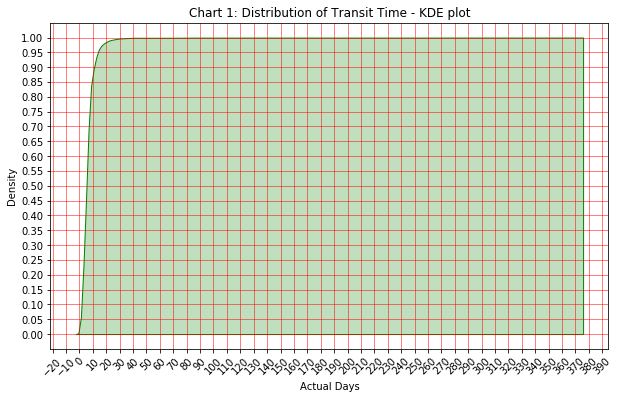

In [208]:
fig = plt.figure(figsize = (10, 6))
ax = sns.kdeplot(inpDf['Actual Days'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('Chart 1: Distribution of Transit Time - KDE plot')
plt.xticks(rotation=45)

Charts 2 & 3: The plots below show that there are outlier transit time values across all location types. These values can be removed prior to further analysis. In addition, deeper investigation is recommended to determine the root cause of these outlier values

Text(0.5, 1.0, 'Chart 3: DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - OUTLIERS')

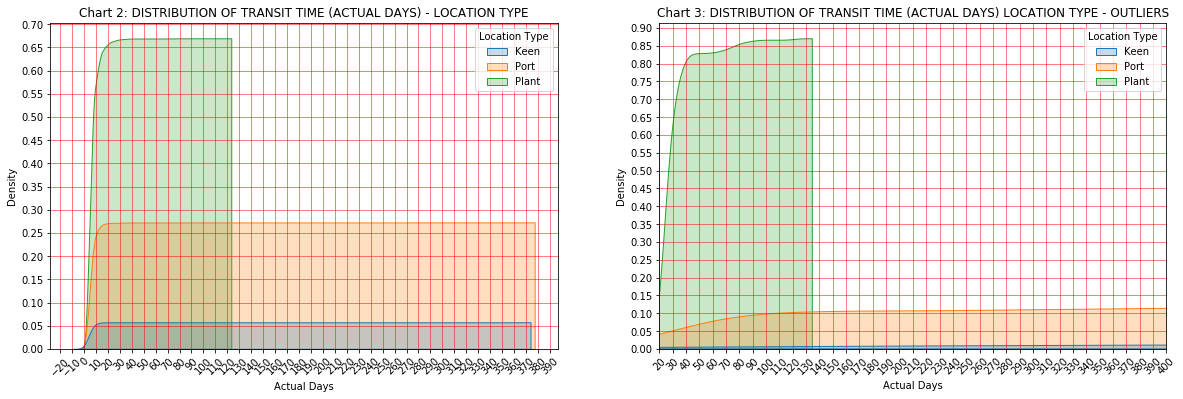

In [209]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1,2,1)
ax = sns.kdeplot(inpDf['Actual Days'], hue = inpDf['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('Chart 2: DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) - LOCATION TYPE')
fig.add_subplot(1,2,2)
ax = sns.kdeplot(inpDf[inpDf['Actual Days']>20]['Actual Days'], hue = inpDf['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.set_xlim(left = 20, right = 400)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('Chart 3: DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - OUTLIERS')


In [210]:
df = inpDf.loc[(inpDf['Actual Days']<=15) & (inpDf['Actual Days']>0),:]

Chart 4: From the below box plot, median transit time = 5 days 

<Figure size 720x432 with 0 Axes>

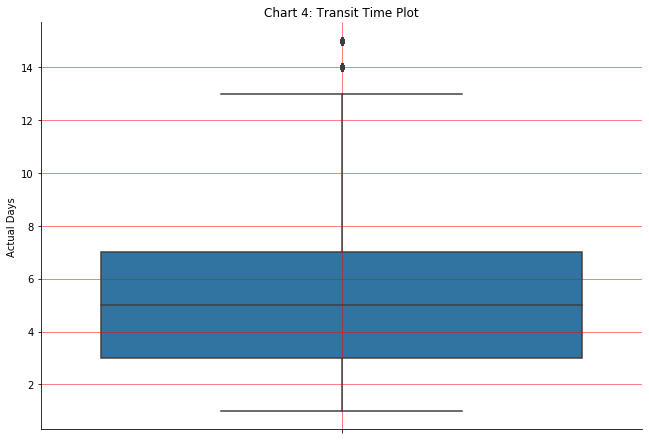

In [211]:
snsPlot('box', data = df, y = 'Actual Days', title = 'Chart 4: Transit Time Plot')

Chart 5: The count of shipments with transit time > 8 days is low and exceptional

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 11 Text xticklabel objects>)

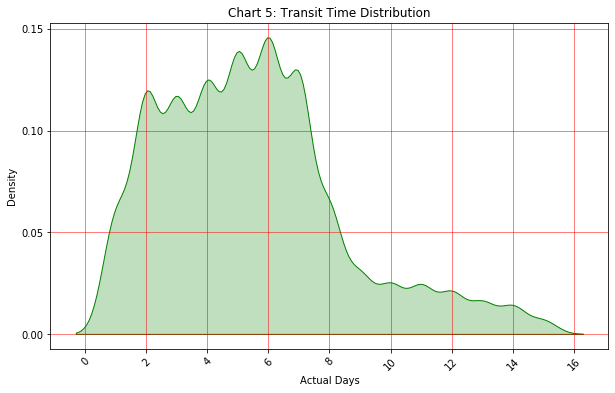

In [212]:
fig = plt.figure(figsize = (10, 6))
ax = sns.kdeplot(df['Actual Days'], color='g', shade = True, cumulative = False)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('Chart 5: Transit Time Distribution')
plt.xticks(rotation=45)

Chart 6: The KDE and violin plots show distribution of transit time after removal of outliers. 95% of the shipments are delivered in 12 days or less. 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 11 Text xticklabel objects>)

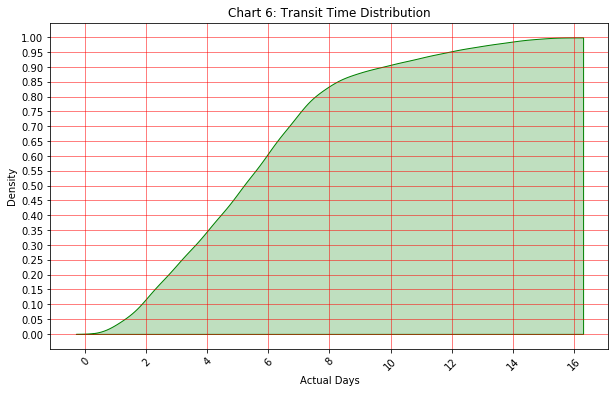

In [213]:
fig = plt.figure(figsize = (10, 6))
ax = sns.kdeplot(df['Actual Days'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('Chart 6: Transit Time Distribution')
plt.xticks(rotation=45)

Chart 7: Based on the violin plot, count of shipments starts decreasing beyond transit time of 8 days 

<Figure size 720x432 with 0 Axes>

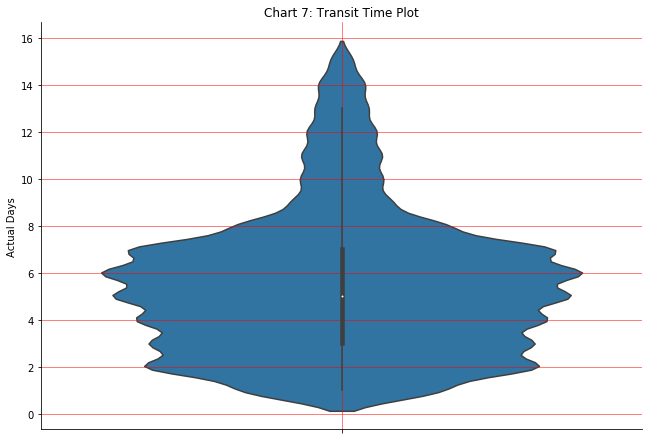

In [214]:
snsPlot('violin', data = df,  y = 'Actual Days', title = 'Chart 7: Transit Time Plot')

Charts 8: <br>
Distribution of transit time by location type: <br>
Plant & ports have similar distribution of transit time -- Min, mean, median, 25th & 75th percentile <br>

<Figure size 720x432 with 0 Axes>

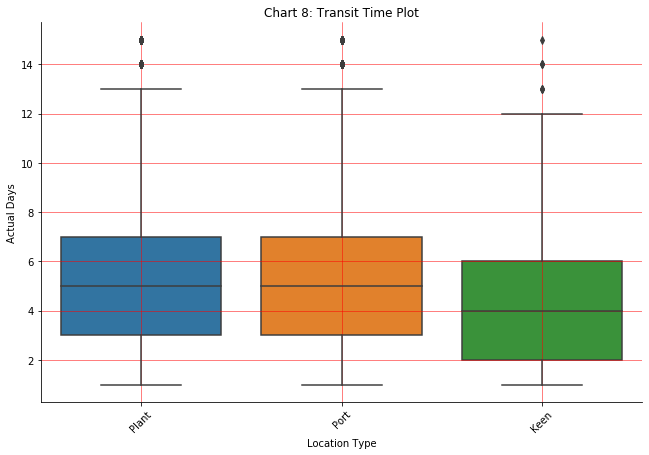

In [215]:
snsPlot('box', data = df, x = 'Location Type', y = 'Actual Days', title = 'Chart 8: Transit Time Plot')

Chart 9: Shipments from Keen locations have a shorter transit time compared to plant and port shipments

Text(0.5, 1.0, 'Chart 9: DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - WITHOUT OUTLIERS')

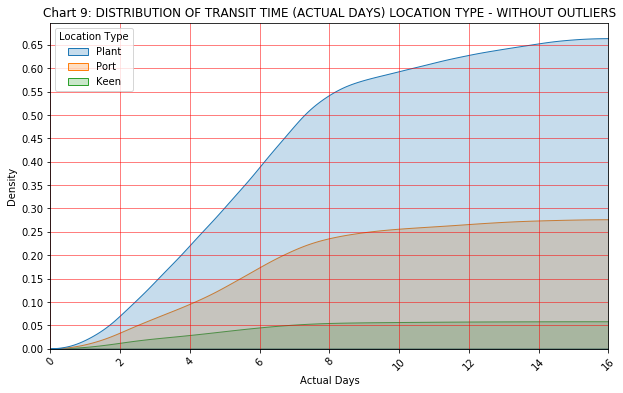

In [216]:
plt.figure(figsize = (10, 6))
#df = inpDf.loc[inpDf['Actual Days']<16 ,:]
ax = sns.kdeplot(df['Actual Days'], hue = df['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
sns.move_legend(ax, loc = 'upper left')
ax.set_title('Chart 9: DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - WITHOUT OUTLIERS')

Charts: 10, 11 & 12 <br>
Analysis of shipment volume by transit time: <br>
Plant & port shipments have maximum volume for transit time of 6 days <br>
Keen shipments have maximum volume for transit time of 2 days

<Figure size 720x432 with 0 Axes>

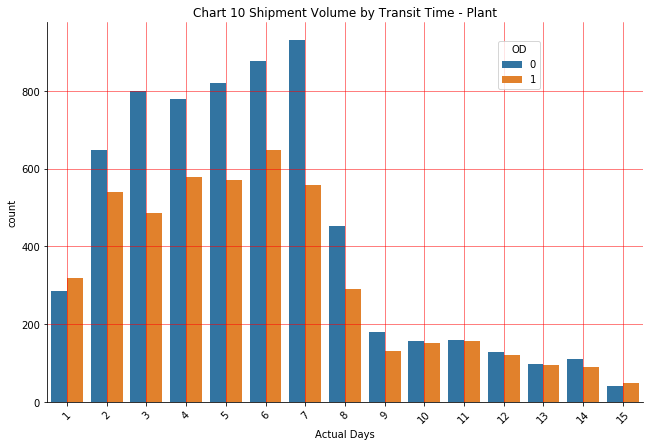

<Figure size 720x432 with 0 Axes>

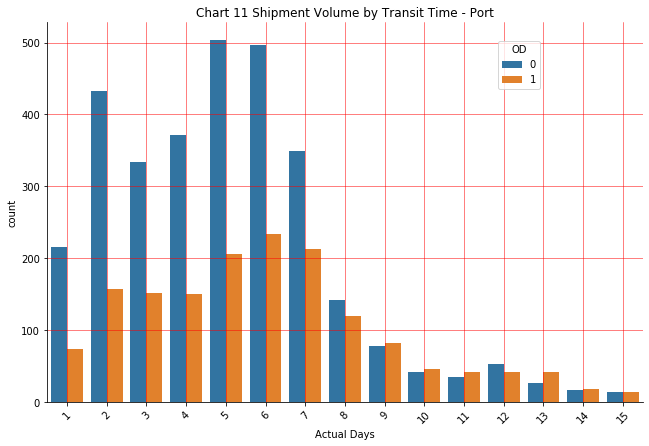

<Figure size 720x432 with 0 Axes>

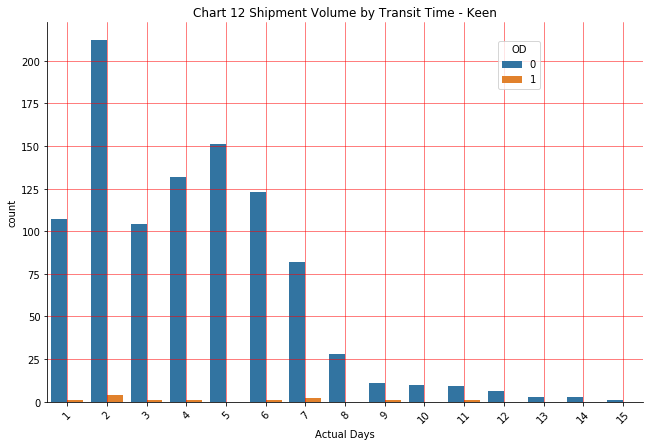

In [217]:
j = 9
for locType in df['Location Type'].unique():
    j += 1
    snsPlot('count', data = df[df['Location Type']== locType], title = ('Chart ' + str(j) + ' Shipment Volume by Transit Time - ' + locType) , x = 'Actual Days', hue = 'OD')

One of the important steps in data exploration is to look for null values and replace them appropriately [delete or impute]. <br> In this dataset there are not any null values

In [218]:
df.isnull().sum().sort_values(ascending = False)

OD                                    0
Domestic/Import/Export/SPV            0
Shipment Loaded Distance              0
Shipment Num Stops                    0
Shipment Number of Orders             0
Actual Days                           0
Tender_Date                           0
Location Type                         0
Shipment Destination Province Code    0
Shipment Source City                  0
Shipment Source Location Name         0
Shipment Service Provider GID         0
dtype: int64

##### Question 2: When are the shipments tendered?

<b>Analysis of Shipment Tenders </b> <br>
Across all locations 6.3% more shipments are tendered on Mondays compared to other days of the week. <br>
This effect is prominent among the plant locations. However, for non-plant locations, shipments are tendered in a more linear fashion throughout the week.

Additional features can be created from date features and insights can be gained from these new features

In [219]:
df['Tender_Day']=df['Tender_Date'].dt.day
df['Tender_DoW'] = df['Tender_Date'].dt.dayofweek
df['Tender_Month'] = df['Tender_Date'].dt.month

/data2/prasannaiyer/envs/pipy335/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/data2/prasannaiyer/envs/pipy335/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data2/prasannaiyer/envs/pipy335/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<b>Plants:</b> 12.5% more shipments are tendered on Mondays compared to other days of the week.<br> 
This is important as shipments tendered on Monday are more likely to be delivered within the week <br>
<b>Non Plant Locations:</b> The opposite trend is observed. 15% - 20% more shipments are tendered between Monday & Friday

In [220]:
tenderDf = pd.DataFrame()
tenderDf['Location Type'] =''
tenderDf['Mon_Shipment_Count'] = ''
tenderDf['Non_Mon_Shipment_Count'] = ''
tenderDf['Avg_By_Day'] = ''
#tenderDf.loc[0] = ['Port',allMonShipments,allMonNonPlant]
i = 0
for locType in ['Plant', 'Port', 'Keen']:
    monShipments = df[(df['Tender_DoW'] == 0) & (df['Location Type'] == locType)]['Tender_DoW'].count().astype(int)
    nonMonShipments = int(df[(df['Tender_DoW'].isin([1,2,3,4])) & (df['Location Type'] == locType)]['Tender_DoW'].value_counts().mean())
    avgByDay = int(df[(df['Tender_DoW'].isin([0,1,2,3,4])) & (df['Location Type'] == locType)]['Tender_DoW'].value_counts().mean())
    tenderDf.loc[i] = [locType, monShipments, nonMonShipments, avgByDay]
    i += 1

In [221]:
display(tenderDf)

,Location Type,Mon_Shipment_Count,Non_Mon_Shipment_Count,Avg_By_Day
0,Plant,2513,2155,2227
1,Port,827,943,920
2,Keen,173,205,198


In [222]:
tenderDf.sum()

Location Type             PlantPortKeen
Mon_Shipment_Count                 3513
Non_Mon_Shipment_Count             3303
Avg_By_Day                         3345
dtype: object

Chart 13: Based on the count plot shown below: <br>
Plants: More shipments are tendered on Mondays compared to other days of the week <br>
Ports/Keen: Linear volume observed across days of the week

<Figure size 720x432 with 0 Axes>

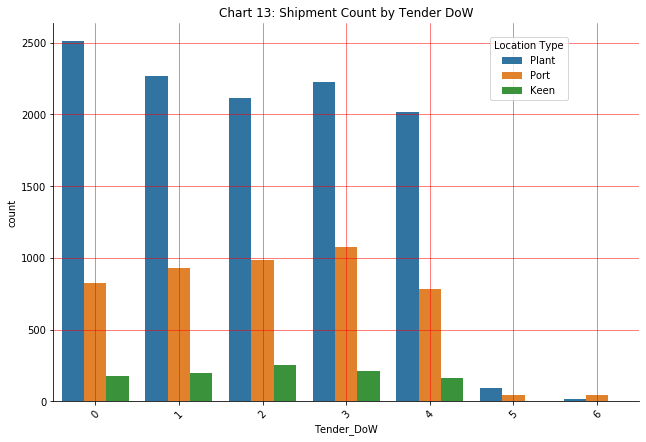

In [223]:
snsPlot('count', df, x = 'Tender_DoW', hue = 'Location Type', title = 'Chart 13: Shipment Count by Tender DoW', order = False)

Chart 14: As shown the bar chart below, shipments tendered mid or later in the week have a longer transit time. 

<Figure size 720x432 with 0 Axes>

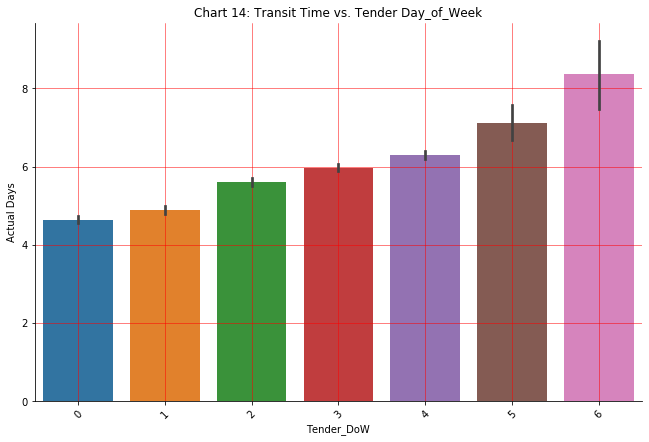

In [224]:
snsPlot(chartType = 'bar', data = df, x = 'Tender_DoW', y = 'Actual Days', title = 'Chart 14: Transit Time vs. Tender Day_of_Week')

##### Question 3: How far do the shipments travel?

<b>Analysis of Shipment Distance</b>

Charts 15 & 16: Based on the distribution of distance, shipments with distance > 2500 miles seem like outliers. <br> After eliminating the outliers, average distance of the shipments = 820 miles <br> Median distance of the shipments = 742 miles <br> 

Text(0.5, 1.0, 'Chart 16: DISTRIBUTION OF SHIPMENT DISTANCE BY LOCATION TYPE')

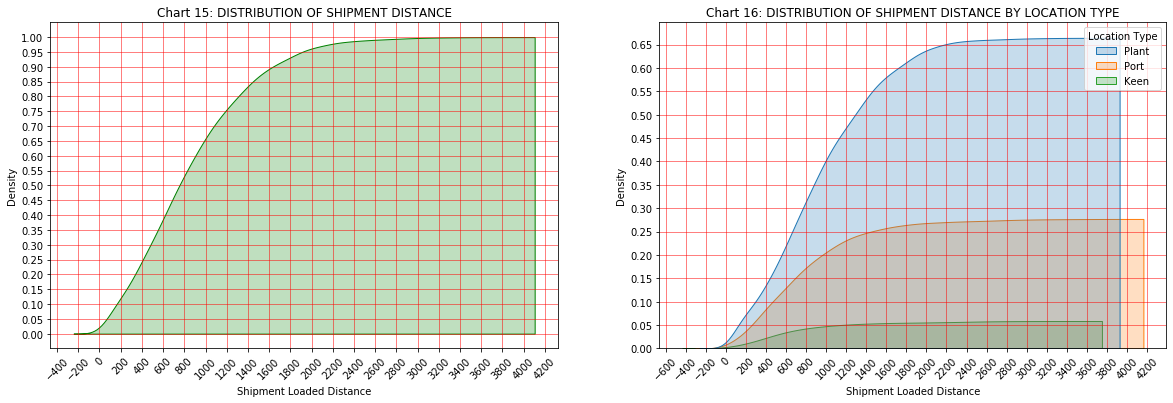

In [225]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
ax = sns.kdeplot(df['Shipment Loaded Distance'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
ax.xaxis.set_major_locator(plt.MultipleLocator(200))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('Chart 15: DISTRIBUTION OF SHIPMENT DISTANCE')
fig.add_subplot(1,2,2)
ax = sns.kdeplot(df['Shipment Loaded Distance'], hue = df['Location Type'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.xaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
ax.set_title('Chart 16: DISTRIBUTION OF SHIPMENT DISTANCE BY LOCATION TYPE')
#snsPlot('count', data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

Chart 17: The box and violin plots below show that distance percentiles and distribution

<Figure size 720x432 with 0 Axes>

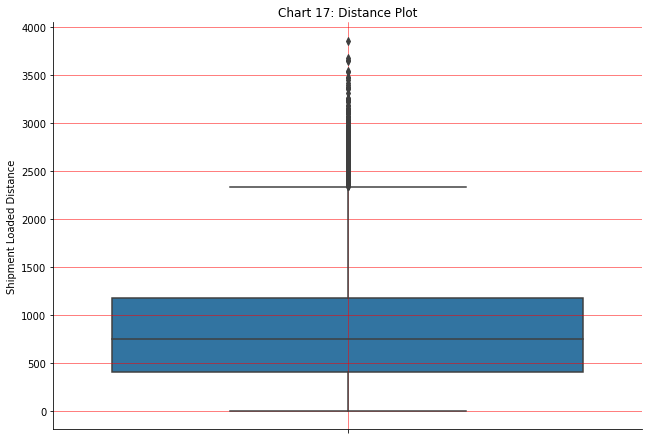

In [226]:
snsPlot('box',df,"Chart 17: Distance Plot", y = 'Shipment Loaded Distance', order = False)

Chart 18: 96% of the shipments travel less than 2000 miles <br> 

<Figure size 720x432 with 0 Axes>

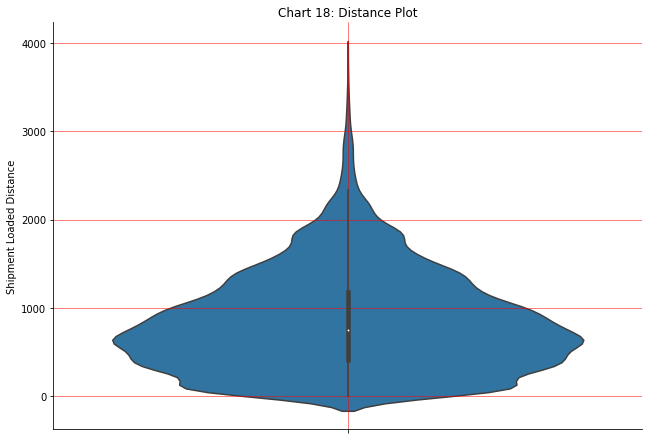

In [227]:
snsPlot('violin',df,"Chart 18: Distance Plot", y = 'Shipment Loaded Distance', order = False)

Chart 19: The KDE plot of the distance shows that 95% of the shipments travel a distance of 1900 miles or less

(array([-600., -400., -200.,    0.,  200.,  400.,  600.,  800., 1000.,
        1200., 1400., 1600., 1800., 2000., 2200., 2400., 2600., 2800.,
        3000., 3200., 3400., 3600., 3800., 4000., 4200., 4400.]),
 <a list of 26 Text xticklabel objects>)

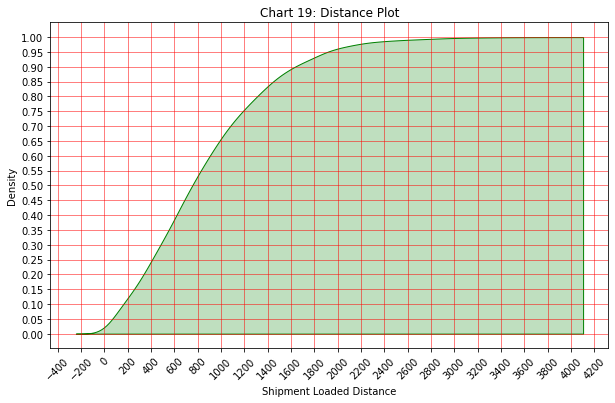

In [228]:
fig = plt.figure(figsize = (10, 6))
ax = sns.kdeplot(df['Shipment Loaded Distance'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(200))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('Chart 19: Distance Plot')
plt.xticks(rotation=45)

The tabular summary as well as the box plot of the distance show that plant shipments travel a longer distance compared to port & keen shipments

In [229]:
distanceDf = pd.DataFrame()
distanceDf['Location Type'] =''
distanceDf['Avg_Distance'] = ''
distanceDf['Median_Distance'] = ''
distanceDf['Shipment_Count'] =''
i = 0
for locType in ['Plant', 'Port', 'Keen']:
    avgDistance = int(df[(df['Shipment Loaded Distance'] < 2501) & (df['Location Type'] == locType)]['Shipment Loaded Distance'].mean())
    medianDistance = int(df[(df['Shipment Loaded Distance'] < 2501) & (df['Location Type'] == locType)]['Shipment Loaded Distance'].median())
    shipmentCount = int(df[(df['Shipment Loaded Distance'] < 2501) & (df['Location Type'] == locType)]['Location Type'].count())
    distanceDf.loc[i] = [locType, avgDistance, medianDistance, shipmentCount]
    i += 1
avgDistance = int(df[(df['Shipment Loaded Distance'] < 2501)]['Shipment Loaded Distance'].mean())
medianDistance = int(df[df['Shipment Loaded Distance'] < 2501]['Shipment Loaded Distance'].median())
shipmentCount = int(df[(df['Shipment Loaded Distance'] < 2501)]['Location Type'].count())
distanceDf.loc[i] = ['All', avgDistance, medianDistance, shipmentCount]
display(distanceDf)

,Location Type,Avg_Distance,Median_Distance,Shipment_Count
0,Plant,888,829,11152
1,Port,700,633,4612
2,Keen,615,476,977
3,All,820,742,16741


Chart 20: Shipments originating from plant locations travel 8.5% greater distance than the overall distance average. It is important to note that 67% of all shipments originate from plant. Plants shipments travel 28% farther than port shipments <br> 

<Figure size 720x432 with 0 Axes>

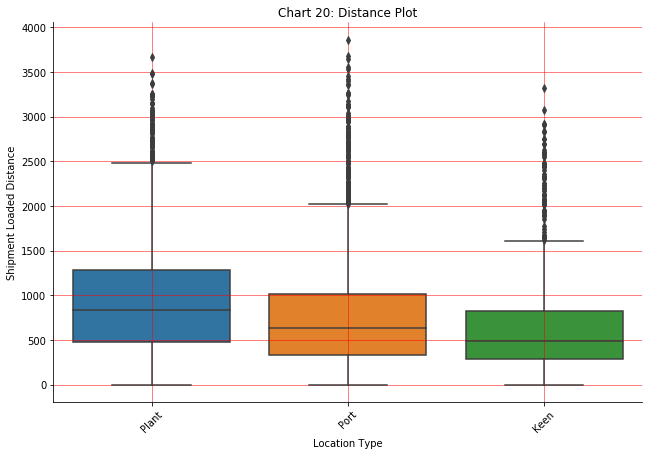

In [230]:
snsPlot('box',df,"Chart 20: Distance Plot",x = 'Location Type', y = 'Shipment Loaded Distance', order = True)

Charts 21 & 22: The bar plots below show that: <br>
Distance travelled by Laredo shipments is longer than other plant locations <br>
New Holland is the location with the most shipments among plants

Text(0.5, 1.0, 'Chart 22: Shipment Count by Plant')

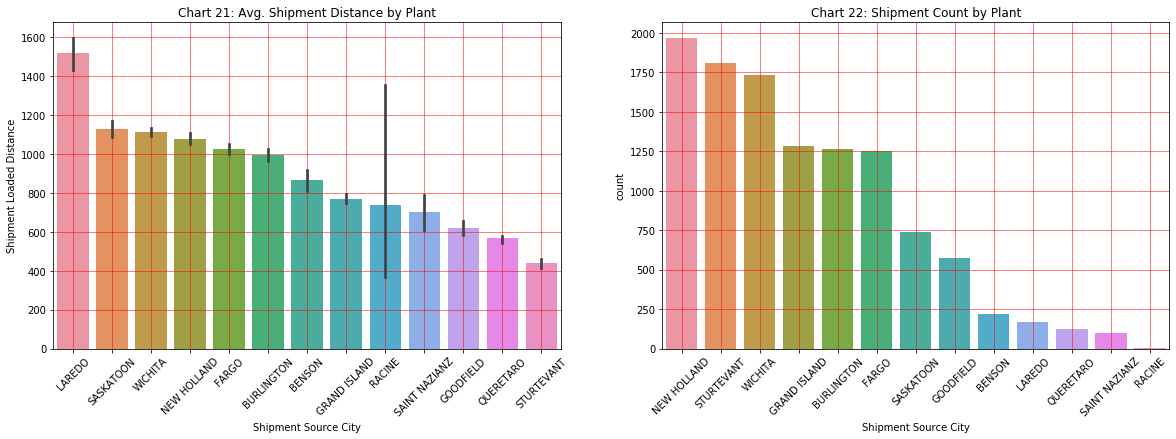

In [231]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = df[df['Location Type']=='Plant'].groupby(by = 'Shipment Source City')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', y = 'Shipment Loaded Distance', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
#sns.move_legend(ax, loc = 'upper right')
ax.set_title('Chart 21: Avg. Shipment Distance by Plant')
fig.add_subplot(1,2,2)
order = df[df['Location Type']=='Plant']['Shipment Source City'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Chart 22: Shipment Count by Plant')
#snsPlot('count', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

Chart 23: From the two bar charts below, it can be observed that as distance increases, the transit time also increases

<Figure size 720x432 with 0 Axes>

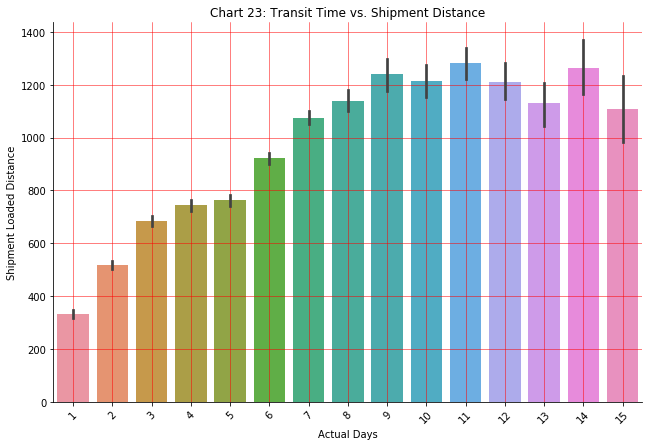

In [232]:
snsPlot(chartType = 'bar', data = df, x = 'Actual Days', y = 'Shipment Loaded Distance', title = 'Chart 23: Transit Time vs. Shipment Distance')

##### Question 4: How many stops do the shipments make till final delivery?

<b> Analysis of STOPS PER SHIPMENT <br>
Average stops per shipment = 2.8 <br>
Port and Keen shipments have a greater proportion of multi-stop shipments (> 2 stops) compared to the plant locations. This is understandable, as Port and Keen locations ship smaller products compared to the plants.

In [233]:
df = df[df['Shipment Loaded Distance']<2501]

In [234]:
df['Shipment Num Stops'].describe()

count    16741.000000
mean         2.767577
std          1.027130
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Shipment Num Stops, dtype: float64

Chart 24: Based on the box plot of the number of stops: 75% of the shipments have 3 stops or less

<Figure size 720x432 with 0 Axes>

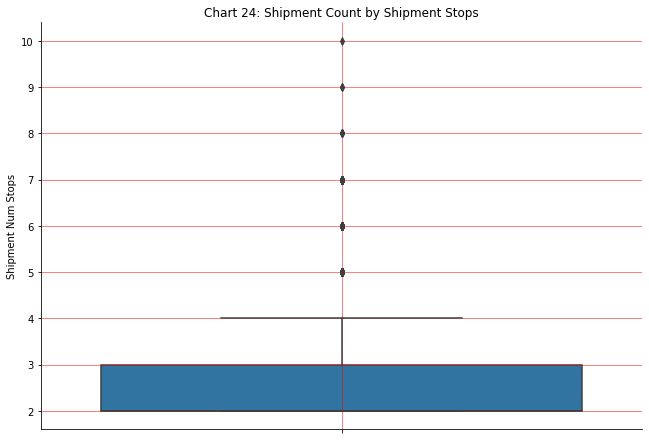

In [235]:
snsPlot(chartType = 'box', data = df, y = 'Shipment Num Stops', title = 'Chart 24: Shipment Count by Shipment Stops' )

Chart 26: Based on the count plots shown below, most number of shipments have 2 stops

<Figure size 720x432 with 0 Axes>

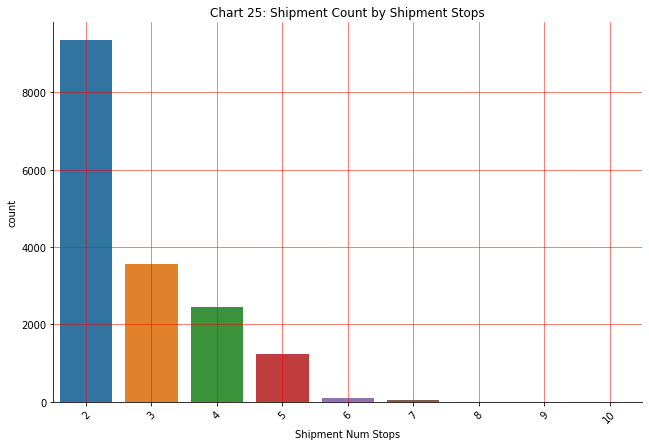

In [236]:
snsPlot(chartType = 'count', data = df, x = 'Shipment Num Stops', title = 'Chart 25: Shipment Count by Shipment Stops' )

Chart 26: Also across location types, maximum number of shipments have 2 stops

<Figure size 720x432 with 0 Axes>

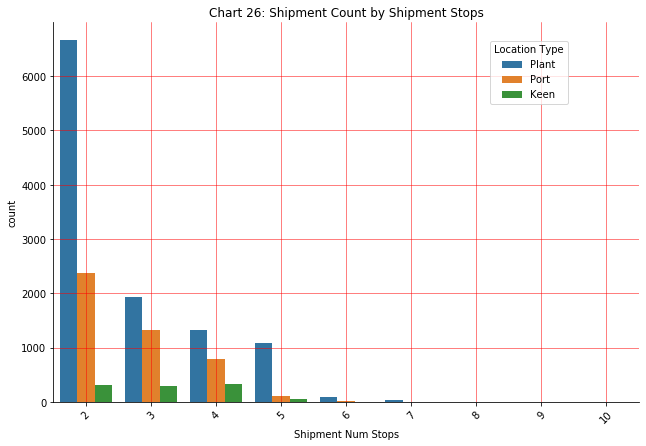

In [237]:
snsPlot(chartType = 'count', data = df, x = 'Shipment Num Stops', title = 'Chart 26: Shipment Count by Shipment Stops', hue = 'Location Type' )

Chart 27: Based on the bar chart below, shipments from keen locations have more stops compared to plant or port locations.

<Figure size 720x432 with 0 Axes>

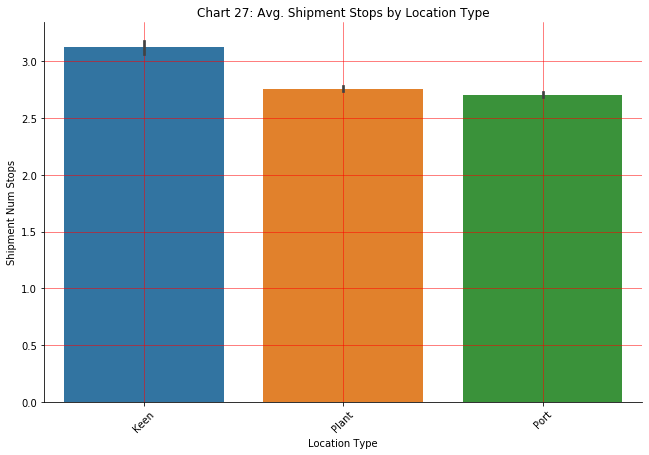

In [238]:
snsPlot('bar', df, 'Chart 27: Avg. Shipment Stops by Location Type', x = 'Location Type', y = 'Shipment Num Stops', order = True)

Charts 28 & 29: The three plots below show -- Shipment stops vs. Shipment distance. Based on the plots, as shipment stops increase, shipment distance also increases <br>
This trend is noticed across all location types

Text(0.5, 1.0, 'Chart 29: Shipment Count by Stop Count')

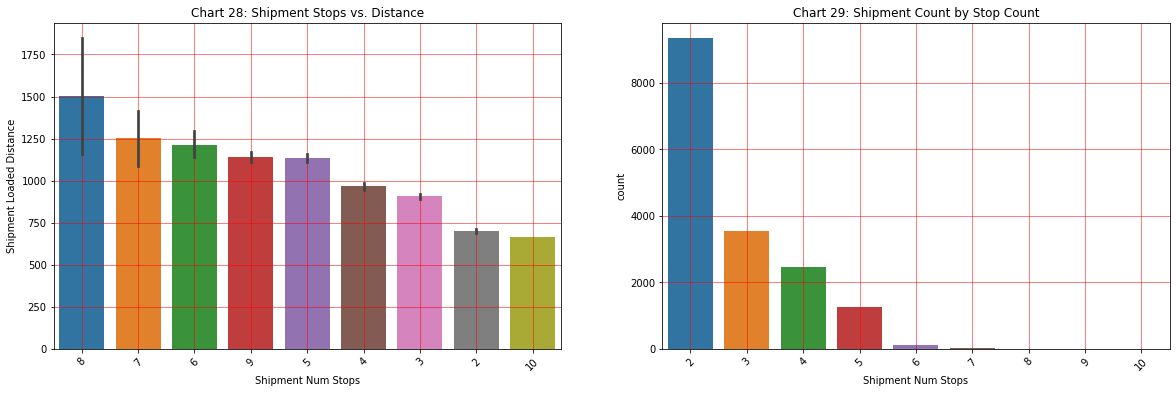

In [239]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = df.groupby(by = 'Shipment Num Stops')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = df, x = 'Shipment Num Stops', y = 'Shipment Loaded Distance', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
#sns.move_legend(ax, loc = 'upper right')
ax.set_title('Chart 28: Shipment Stops vs. Distance')
fig.add_subplot(1,2,2)
order = df['Shipment Num Stops'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df, x = 'Shipment Num Stops', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Chart 29: Shipment Count by Stop Count')
#sns.move_legend(ax, loc = 'upper right')
#snsPlot('count', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

Charts 30 & 31: Also across location types, shipment distance increases with shipment stops

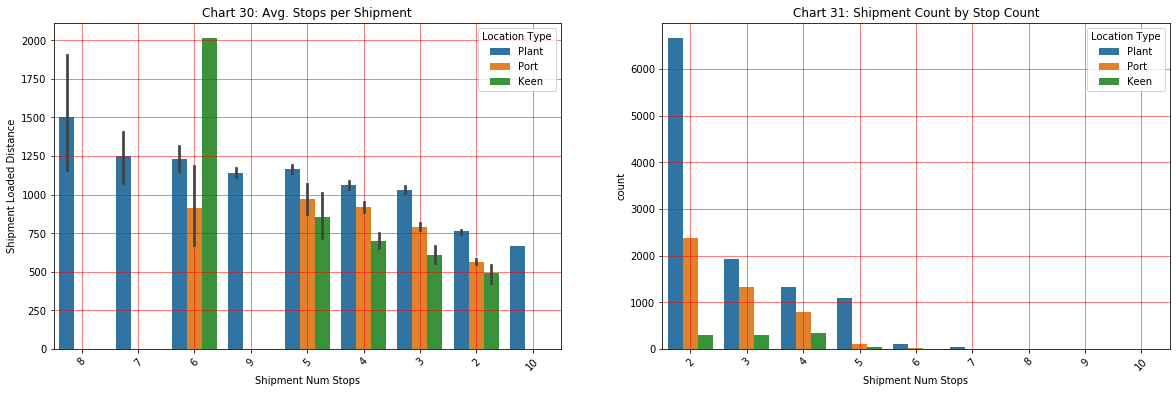

In [240]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = df.groupby(by = 'Shipment Num Stops')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = df, x = 'Shipment Num Stops', y = 'Shipment Loaded Distance', hue = 'Location Type', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
sns.move_legend(ax, loc = 'upper right')
ax.set_title('Chart 30: Avg. Stops per Shipment')
fig.add_subplot(1,2,2)
order = df['Shipment Num Stops'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df, x = 'Shipment Num Stops', hue = 'Location Type', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Chart 31: Shipment Count by Stop Count')
sns.move_legend(ax, loc = 'upper right')
#snsPlot('count', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

Charts 32 & 33: The KDE plots below show that 95% of the shipments have 5 stops or less

Text(0.5, 1.0, 'Chart 33: DISTRIBUTION OF SHIPMENT STOPS BY LOCATION TYPE')

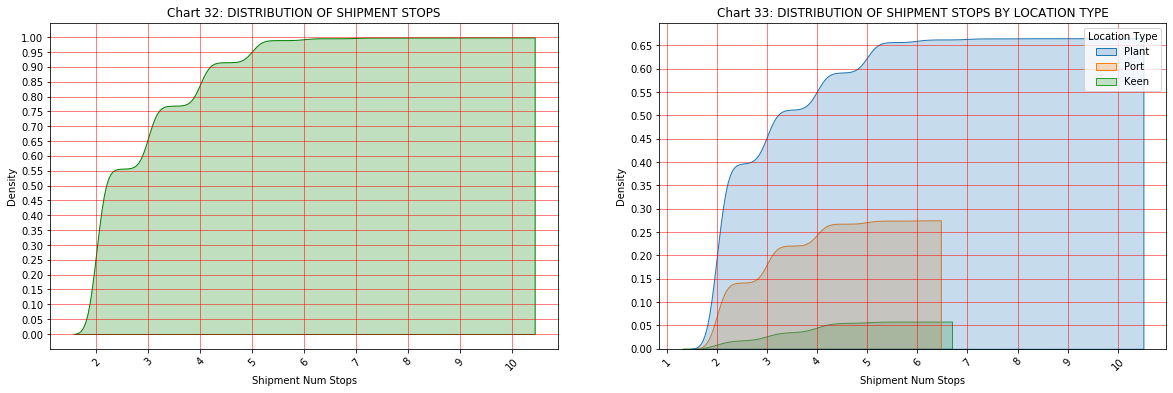

In [241]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
ax = sns.kdeplot(df['Shipment Num Stops'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('Chart 32: DISTRIBUTION OF SHIPMENT STOPS')
fig.add_subplot(1,2,2)
ax = sns.kdeplot(df['Shipment Num Stops'], hue = df['Location Type'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(rotation=45)
ax.set_title('Chart 33: DISTRIBUTION OF SHIPMENT STOPS BY LOCATION TYPE')
#snsPlot('count', data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)